<h1>Download Data</h1>
We use <a href="https://github.com/gulvarol/grocerydataset">Grocery Dataset</a> collected by Idea Teknoloji, Istanbul, Turkey. It contains 354 tobacco shelves images collected from ~40 locations with 4 cameras.<br>
For the sake of clarity create "data" directory with "images" directory inside. Download and unpack grocery dataset images there.<br>
<p>The images dataset can be downloaded using wget and unpacked using tar:</p>
<ul style="list-style-type:none">
    <li>wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz</li>
    <li>wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz</li>
    <li>tar -xvzf GroceryDataset_part1.tar.gz</li>
    <li>tar -xvzf GroceryDataset_part2.tar.gz</li>
 </ul>
 After downloading and unpacking your nn-grocery-shelves/data/images/ directory should appear as follows:
 <ul style="list-style-type:none">
    <li>+ your nn-grocery-shelves/data/images/
         <ul style="list-style-type:none">
            <li>+ BrandImages</li>
            <li>+ BrandImagesFromShelves</li>
            <li>+ ProductImages</li>
            <li>+ ProductImagesFromShelves</li>
            <li>+ ShelfImages</li></ul></li></ul>

In [65]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [100]:
data_path = 'data/'
# we'll use data from two folders
shelf_images = 'data/images/ShelfImages/'
product_images = 'data/images/ProductImagesFromShelves/'

<h3>ShelfImages</h3>
Directory contains JPG files named the same way as C3_P06_N3_S3_1.JPG file:
<ul>
    <li>C3_P06 - shelf id</li>
    <li>N3_S3_1 - planogram id</li>
</ul>


In [78]:
# get all shelves photo data from ShelfImages
photos_df = pd.DataFrame([[f, f[:6], f[7:14]] for f in os.listdir(f'{shelf_images}') if f.endswith('JPG')], 
                         columns=['file', 'shelf_id', 'planogram_id'])
photos_df.head()

,file,shelf_id,planogram_id
0,C3_P06_N3_S3_1.JPG,C3_P06,N3_S3_1
1,C1_P06_N3_S3_1.JPG,C1_P06,N3_S3_1
2,C2_P08_N3_S3_1.JPG,C2_P08,N3_S3_1
3,C2_P08_N1_S3_2.JPG,C2_P08,N1_S3_2
4,C1_P10_N1_S4_1.JPG,C1_P10,N1_S4_1


<h3>ProductImagesFromShelves</h3>
Directory contains png files grouped by category named the same way as C1_P01_N1_S2_1.JPG_1008_1552_252_376.png file:
<ul>
    <li>C1_P01_N1_S2_1.JPG - shelf photo file</li>
    <li>1008 - x</li>
    <li>1552 - y</li>
    <li>252 - w</li>
    <li>376 - h</li>
</ul>

In [87]:
# get products on shelves photo data from ProductImagesFromShelves
products_df = pd.DataFrame([[f[:18], f[:6], f[7:14], i, *map(int, f[19:-4].split('_'))]
                            for i in range(11) for f in os.listdir(f'{product_images}{i}') if f.endswith('png')],
                           columns=['file', 'shelf_id', 'planogram_id', 'category', 'xmin', 'ymin', 'w', 'h'])
products_df['xmax'] = products_df['xmin'] + products_df['w']
products_df['ymax'] = products_df['ymin'] + products_df['h']
products_df.head()


,file,shelf_id,planogram_id,category,xmin,ymin,w,h,xmax,ymax
0,C1_P08_N2_S3_1.JPG,C1_P08,N2_S3_1,0,1812,300,212,396,2024,696
1,C4_P07_N2_S4_1.JPG,C4_P07,N2_S4_1,0,312,1716,160,284,472,2000
2,C2_P01_N2_S3_2.JPG,C2_P01,N2_S3_2,0,1468,1244,140,204,1608,1448
3,C1_P12_N2_S5_1.JPG,C1_P12,N2_S5_1,0,236,2092,164,260,400,2352
4,C1_P08_N3_S4_2.JPG,C1_P08,N3_S4_2,0,740,1488,208,328,948,1816


In [101]:
# save to pkl
photos_df.to_pickle(f'{data_path}photos.pkl')
products_df.to_pickle(f'{data_path}products.pkl')

In [98]:
# function to display shelf photo with rectangled products
def draw_shelf_photo(file):
    im = cv2.imread(f'{shelf_images}{file}')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    for xmin, ymin, xmax, ymax in products_df[products_df.file == file][['xmin', 'ymin', 'xmax', 'ymax']].values:
        cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
    plt.imshow(im)

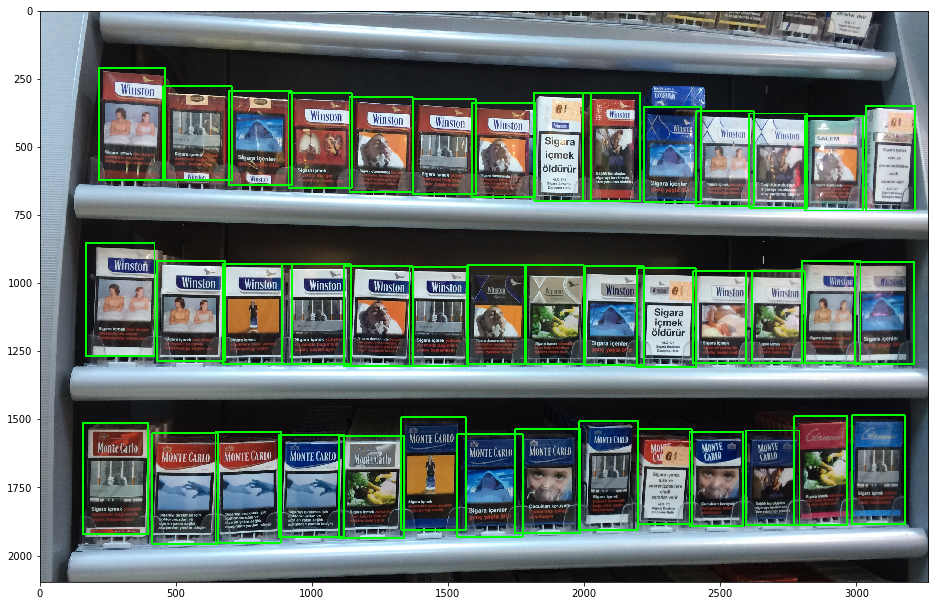

In [99]:
# draw one photo
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('C1_P08_N2_S3_1.JPG')